In [118]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson, nquad
from sympy import symbols, diff, integrate, lambdify

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre*: Miguel Ángel Jaramillo Valencia

*Identificación:* 1000762075

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [119]:
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")

Resultado de la integral: -0.6500971589021813
Error estimado: 1.8391891749223705e-12


In [120]:
fw = lambda w, z, y, x: x + y + z + w

w_limits1 = lambda z, y, x: z**2
w_limits2 = lambda z, y, x: z + 3

z_limits1 = lambda y, x: y ** 2
z_limits2 = lambda y, x: y + 2


y_limits1 = lambda x: x**2
y_limits2 = lambda x: x+1

In [121]:
integral_w = lambda z, y ,x: quad(lambda w: fw(w,z,y,x), w_limits1(z,y,x), w_limits2(z,y,x))[0]
integral_z = lambda y, x: quad(lambda z: integral_w(z,y,x), z_limits1(y,x), z_limits2(y,x))[0]
integral_y = lambda x: quad(lambda y: integral_z(y,x), y_limits1(x), y_limits2(x))[0]
integral_x = quad(integral_y, 0, 1)

integral_x[0] - result, integral_x[1] - error

(0.0, -1.681056644203649e-12)

# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



In [122]:
a = 1
I = 3
k = 1

def k_2(r, theta):
  return (4 * a * r * np.sin(theta)) / (a ** 2 + r ** 2 + 2 * a * r * np.sin(theta))

def K(r, theta, phi):
  return 1 / np.sqrt(1 - k_2(r,theta) * np.sin(phi) ** 2)

def integral_K(r, theta):
  def integrand(phi):
    return 1 / np.sqrt(1 - k_2(r,theta) * np.sin(phi) ** 2) #función anidada que recibe la variable de integración habiendo definido antes las variables r y theta, que son las variables en que va a quedar la función integrada
  result = quad(integrand, 0, np.pi/2)[0] #devuelve la integral como una función de theta y r
  return result

def integral_E(r, theta):
  def integrand(phi):
     return np.sqrt(1 - k_2(r,theta) * np.sin(phi) ** 2) # misma explicación de arriba
  result = quad(integrand, 0, np.pi/2)[0]
  return result


def A(r, theta): # función que depende sólo de r y theta, que son las variables de k_2 y las integrales anteriores
  return (k * 4 * I * a) / np.sqrt(a ** 2 + r ** 2 + 2 * a * r * np.sin(theta)) * (((2 - k_2(r, theta)) * integral_K(r, theta) - 2 * integral_E(r, theta))/ k_2(r, theta))

<ipython-input-122-a47e4a8a1b6e>:25: RuntimeWarning: invalid value encountered in scalar divide
  return (k * 4 * I * a) / np.sqrt(a ** 2 + r ** 2 + 2 * a * r * np.sin(theta)) * (((2 - k_2(r, theta)) * integral_K(r, theta) - 2 * integral_E(r, theta))/ k_2(r, theta))


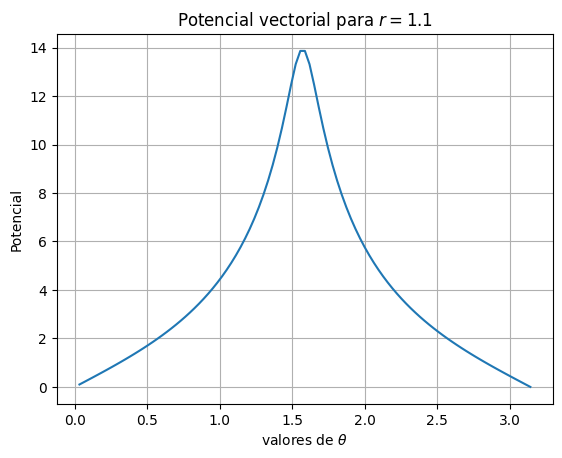

In [123]:
theta = np.linspace(0, np.pi - 1e-8, 100)
values1 = np.zeros(100)

for i in range(len(theta)):
    values1[i] = A(1.1, theta[i])

plt.plot(theta, values1)
plt.grid()
plt.title('Potencial vectorial para $ r = 1.1$')
plt.xlabel(r'valores de $\theta$')
plt.ylabel('Potencial')
plt.show()

<ipython-input-122-a47e4a8a1b6e>:25: RuntimeWarning: invalid value encountered in scalar divide
  return (k * 4 * I * a) / np.sqrt(a ** 2 + r ** 2 + 2 * a * r * np.sin(theta)) * (((2 - k_2(r, theta)) * integral_K(r, theta) - 2 * integral_E(r, theta))/ k_2(r, theta))


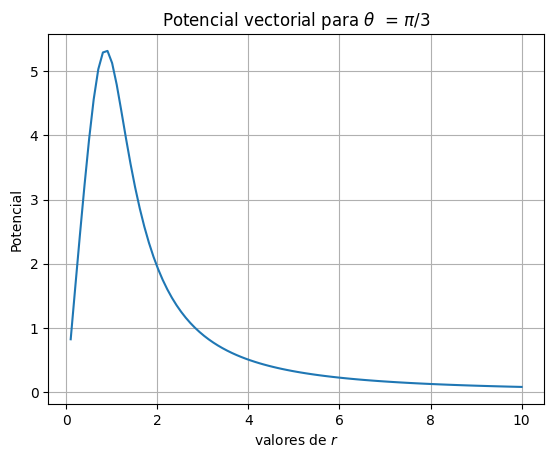

In [124]:
r = np.linspace(0, 10 - 1e-10, 100)
values2 = np.zeros(100)

for i in range(len(r)):
    values2[i] = A(r[i], np.pi/3)

plt.plot(r, values2)
plt.grid()
plt.title(r'Potencial vectorial para $\theta$  = $\pi/3$')
plt.xlabel(r'valores de $r$')
plt.ylabel('Potencial')
plt.show()

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

In [125]:
def potencia_inversa(A, tol  = 1e-7, max_iter = 100):

  n = A.shape[0] #dimensión del vector que vamos a encontrar

  x0 = np.random.rand(n)

  lambda_0 = 0.0 #valor propio mínimo inicial

  lambda_ = []

  for k in range(max_iter):

    y_k = np.linalg.solve(A, x0)

    xk_new = y_k / np.linalg.norm(y_k, ord=2)

    #aplicando cociente de Rayleigh

    lambda_k_min = (xk_new.T @ A @ xk_new) / (xk_new.T @ xk_new)
    lambda_.append(lambda_k_min)

    if abs(lambda_k_min - lambda_0) < tol:
      print(f'converge con {k+1} iteraciones')

      return lambda_k_min, xk_new, lambda_, k

    lambda_0 = lambda_k_min
    x0 = xk_new

  print('El método no converge')
  return xk_new, lambda_k_min, lambda_

In [126]:
A = np.array([
    [5, 2],
    [2, 2]
])
P = potencia_inversa(A)
lambda_ = P[2]
k = P[-1]
P[0:2]

converge con 6 iteraciones


(1.0000000005758491, array([-0.447204  ,  0.89443199]))

In [127]:
np.linalg.eig(A)

EigResult(eigenvalues=array([6., 1.]), eigenvectors=array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]]))

In [128]:
k = np.arange(k+1)

Text(0.5, 1.0, 'Convergencia del autovalor mínimo en función de las iteraciones')

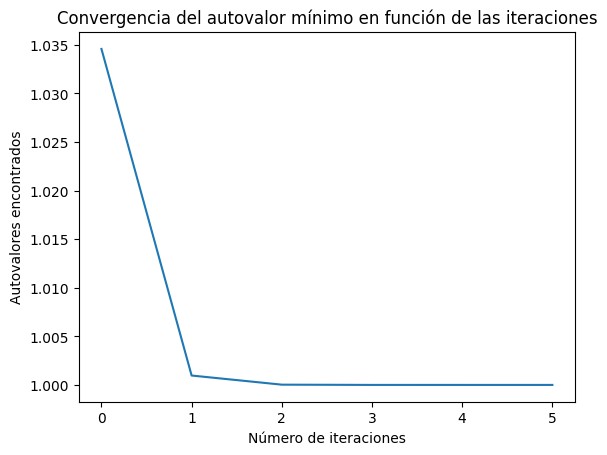

In [129]:
plt.plot(k, lambda_)
plt.xlabel('Número de iteraciones')
plt.ylabel('Autovalores encontrados')
plt.title('Convergencia del autovalor mínimo en función de las iteraciones')

Se observa que el método converge muy rápidamente

#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [130]:
B = np.random.randint(1, 100, size =(5,5))
eig = np.linalg.eig(B)[0]

prod = np.prod(eig)
real = np.linalg.det(B)

error = abs(prod - real)

print(f'El determinante por propiedad es: {prod}, el determinante con np. linalg es: {real} \n el error entre ambos es: {error}')

El determinante por propiedad es: (-448144881.99999875+2.7779625974279644e-08j), el determinante con np. linalg es: -448144882.0000003 
 el error entre ambos es: 1.5499697269586944e-06
